In [1]:
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

### Example 1: https://engineering.purdue.edu/~djiao/ee618/classnote/Lect16-FEM-Example-BasicSteps.pdf

In [2]:
# Create mesh and define function space
# IntervalMesh(nx, a, b)
# nx (int) The number of cells, a (float) The minimum point (inclusive), b (float) The maximum point (inclusive).
circle = Circle(Point(0.0, 0.0),1)
mesh = generate_mesh(circle, 20)


In [6]:
V = FunctionSpace(mesh, "P", 2)
u_D = Expression("(1 - pow(x[0], 2) - pow(x[1], 2))/4", degree=2)
f = Constant(4)

# Define boundary condition

def boundary(x, on_boundary):
    return on_boundary 

bc = DirichletBC(V, Constant(0), boundary)

In [7]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(v), grad(u))*dx
L = v * f* dx

In [8]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

/Users/edwardtang/anaconda3/envs/fenics2018/lib/python3.7/site-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'tite', 'scalarbar'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


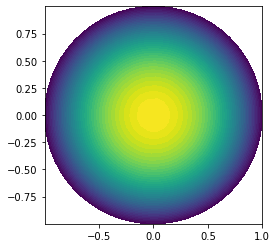

In [9]:
plot(u, tite="Finite element mesh", scalarbar=True)
# plot(mesh)

In [10]:
vtkfile = File("poisson/Example_3_FEM_practice_2D.pvd")
vtkfile << u

In [11]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, "L2")

# Compute maximum error at vertices
# vertex_values_u_D = u_D.compute_vertex_values(mesh)
# vertex_values_u = u.compute_vertex_values(mesh)

# error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))


In [12]:
# Print errors
print("error_L2 =", error_L2)
# print("error_max =", error_max)

error_L2 = 0.003003518689216489
